In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
import tensorflow as tf
from keras.callbacks import ReduceLROnPlateau
from imblearn.over_sampling import RandomOverSampler 
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix , classification_report
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
FilePath = "hmnist_28_28_RGB.csv"
dataSet = pd.read_csv(FilePath)
dataSet.head()

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel2343,pixel2344,pixel2345,pixel2346,pixel2347,pixel2348,pixel2349,pixel2350,pixel2351,label
0,192,153,193,195,155,192,197,154,185,202,...,173,124,138,183,147,166,185,154,177,2
1,25,14,30,68,48,75,123,93,126,158,...,60,39,55,25,14,28,25,14,27,2
2,192,138,153,200,145,163,201,142,160,206,...,167,129,143,159,124,142,136,104,117,2
3,38,19,30,95,59,72,143,103,119,171,...,44,26,36,25,12,17,25,12,15,2
4,158,113,139,194,144,174,215,162,191,225,...,209,166,185,172,135,149,109,78,92,2


In [4]:
Label = dataSet["label"]
Data = dataSet.drop(columns=["label"]) 
dataSet.head()

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel2343,pixel2344,pixel2345,pixel2346,pixel2347,pixel2348,pixel2349,pixel2350,pixel2351,label
0,192,153,193,195,155,192,197,154,185,202,...,173,124,138,183,147,166,185,154,177,2
1,25,14,30,68,48,75,123,93,126,158,...,60,39,55,25,14,28,25,14,27,2
2,192,138,153,200,145,163,201,142,160,206,...,167,129,143,159,124,142,136,104,117,2
3,38,19,30,95,59,72,143,103,119,171,...,44,26,36,25,12,17,25,12,15,2
4,158,113,139,194,144,174,215,162,191,225,...,209,166,185,172,135,149,109,78,92,2


<Axes: xlabel='label', ylabel='Count'>

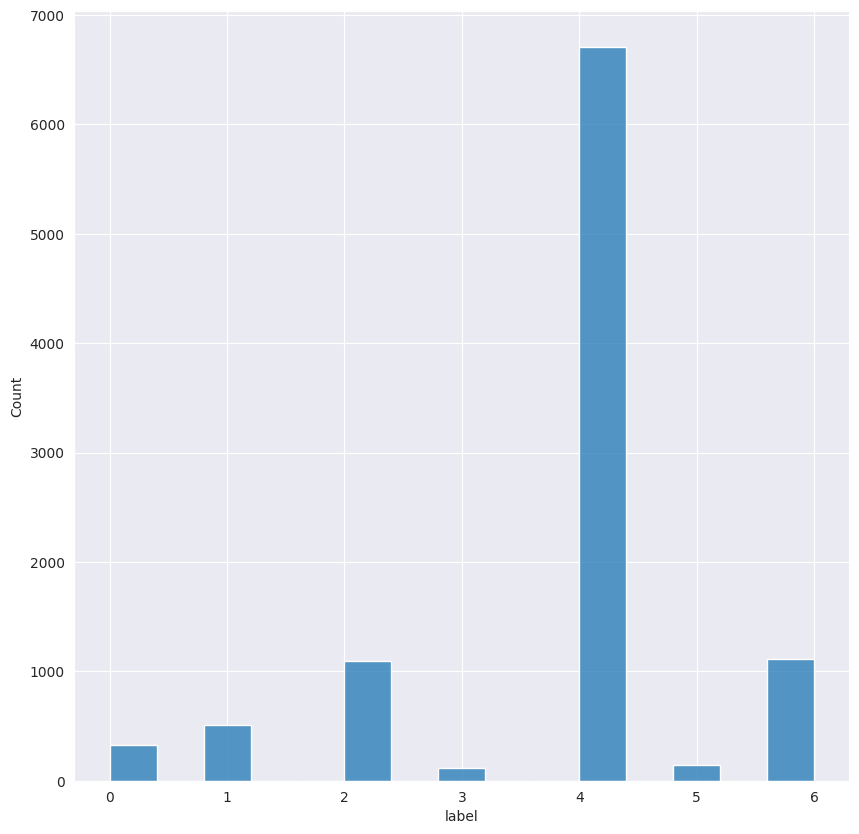

In [5]:
plt.figure(figsize = (10,10))
sns.set_style("darkgrid")
sns.histplot(Label)

In [7]:
oversample = RandomOverSampler()
Data,Label  = oversample.fit_resample(Data,Label)
Data = np.array(Data).reshape(-1,28,28,3)
print('Shape of Data :',Data.shape)

Shape of Data : (46935, 28, 28, 3)


<Axes: xlabel='label', ylabel='Count'>

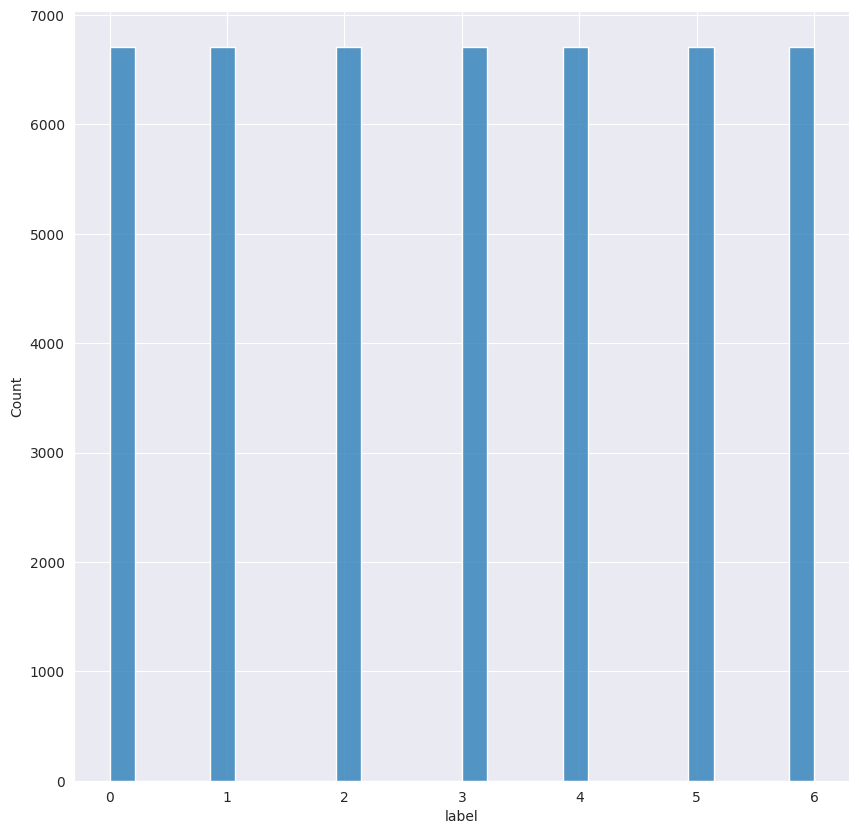

In [8]:
plt.figure(figsize = (10,10))
sns.set_style("darkgrid")
sns.histplot(Label)

In [9]:
print(Data)

[[[[192 153 193]
   [195 155 192]
   [197 154 185]
   ...
   [193 144 153]
   [197 154 163]
   [194 152 160]]

  [[197 162 202]
   [201 160 197]
   [202 160 193]
   ...
   [194 147 149]
   [198 158 166]
   [192 153 167]]

  [[197 155 193]
   [198 154 185]
   [202 156 191]
   ...
   [194 149 152]
   [199 161 177]
   [194 156 175]]

  ...

  [[194 157 191]
   [206 173 206]
   [206 165 192]
   ...
   [191 155 183]
   [193 159 187]
   [193 163 197]]

  [[187 154 185]
   [203 171 199]
   [202 161 183]
   ...
   [178 131 148]
   [187 152 174]
   [190 159 189]]

  [[171 136 164]
   [191 153 179]
   [196 155 176]
   ...
   [173 124 138]
   [183 147 166]
   [185 154 177]]]


 [[[ 25  14  30]
   [ 68  48  75]
   [123  93 126]
   ...
   [123  92  99]
   [ 79  53  74]
   [ 59  37  62]]

  [[ 42  28  49]
   [ 97  70  97]
   [144 111 145]
   ...
   [141 108 110]
   [ 98  69  78]
   [ 63  40  63]]

  [[ 67  47  69]
   [121  89 111]
   [160 120 155]
   ...
   [160 126 137]
   [122  94 102]
   [ 77  54

In [10]:

Label = np.array(Label)
Label

array([2, 2, 2, ..., 6, 6, 6])

In [11]:
classes = {4: ('nv', ' melanocytic nevi'),
           6: ('mel', 'melanoma'),
           2 :('bkl', 'benign keratosis-like lesions'), 
           1:('bcc' , ' basal cell carcinoma'),
           5: ('vasc', ' pyogenic granulomas and hemorrhage'),
           0: ('akiec', 'Actinic keratoses and intraepithelial carcinomae'),
           3: ('df', 'dermatofibroma')}

print('\n Classes')
print('_____________________________________________________________')
print('0:     |   Actinic keratoses and intraepithelial carcinomae')
print('1:     |   basal cell carcinoma')
print('2:     |   benign keratosis-like lesions')
print('3:     |   dermatofibroma')
print('4:     |   melanocytic nevi')
print('5:     |   pyogenic granulomas and hemorrhage')
print('6:     |   melanoma')


 Classes
_____________________________________________________________
0:     |   Actinic keratoses and intraepithelial carcinomae
1:     |   basal cell carcinoma
2:     |   benign keratosis-like lesions
3:     |   dermatofibroma
4:     |   melanocytic nevi
5:     |   pyogenic granulomas and hemorrhage
6:     |   melanoma


In [12]:
X_train , X_test , y_train , y_test = train_test_split(Data , Label , test_size = 0.25 , random_state = 49)


In [13]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(35201, 28, 28, 3)
(11734, 28, 28, 3)
(35201,)
(11734,)


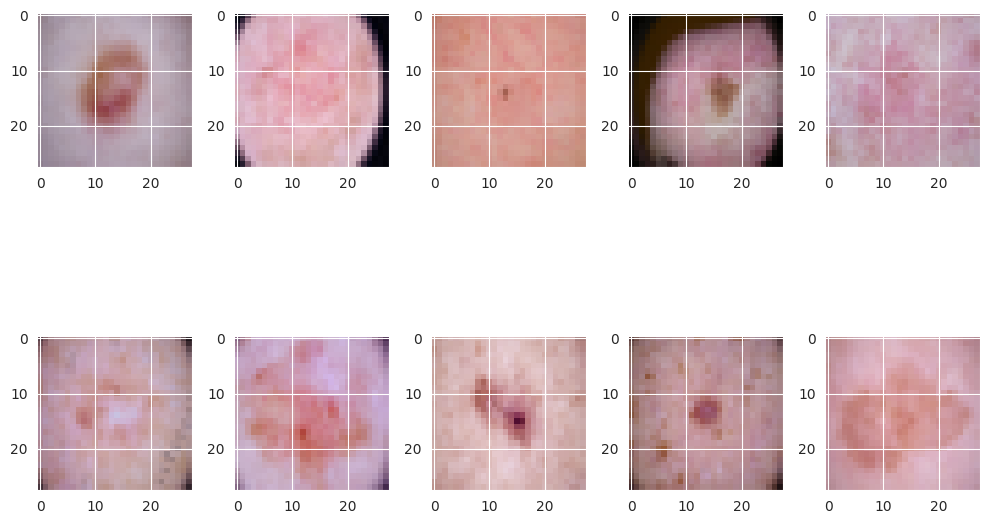

In [14]:
f , ax = plt.subplots(2,5)
f.set_size_inches(10, 10)
k = 0 
for i in range(2):
    for j in range(5):
        ax[i,j].imshow(X_train[k].reshape(28,28,3))
        k = k + 1
    plt.tight_layout()

In [15]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [16]:
print(y_train)

[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]]


In [17]:
datagen = ImageDataGenerator(rescale=(1./255)
                             ,rotation_range=10
                             ,zoom_range = 0.1
                             ,width_shift_range=0.1
                             ,height_shift_range=0.1)
testgen = ImageDataGenerator(rescale=(1./255))

In [18]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy'
                                            , patience = 2
                                            , verbose=1
                                            ,factor=0.5
                                            , min_lr=0.00001)

In [19]:
def My_Model():
  input_ = keras.layers.Input(shape = [28,28,3])
  x = keras.layers.Conv2D(32 , (3,3) , activation='relu',padding='same' , kernel_initializer='he_normal')(input_)
  x = keras.layers.MaxPooling2D()(x)
  x = keras.layers.BatchNormalization()(x)
  x = keras.layers.Conv2D(64 , (3,3) , activation='relu',padding='same' , kernel_initializer='he_normal')(x)
  x = keras.layers.Conv2D(64 , (3,3) , activation='relu',padding='same' , kernel_initializer='he_normal')(x)
  x = keras.layers.MaxPooling2D()(x)
  x = keras.layers.BatchNormalization()(x)
  x = keras.layers.Conv2D(128 , (3,3) , activation='relu',padding='same' , kernel_initializer='he_normal')(x)
  x = keras.layers.Conv2D(128 , (3,3) , activation='relu',padding='same' , kernel_initializer='he_normal')(x)
  x = keras.layers.MaxPooling2D()(x)
  x = keras.layers.BatchNormalization()(x)
  x = keras.layers.Conv2D(256 , (3,3) , activation='relu' ,padding='same', kernel_initializer='he_normal')(x)
  x = keras.layers.Conv2D(256 , (3,3) , activation='relu' ,padding='same', kernel_initializer='he_normal')(x)
  x = keras.layers.MaxPooling2D()(x)
  flatten  = keras.layers.Flatten()(x)
  classifier = keras.layers.Dropout(rate = 0.2)(flatten)
  classifier = keras.layers.Dense(units = 256 , activation = 'relu' , kernel_initializer = 'he_normal')(classifier)
  classifier = keras.layers.BatchNormalization()(classifier)
  classifier = keras.layers.Dense(units = 128 , activation = 'relu' , kernel_initializer = 'he_normal')(classifier)
  classifier = keras.layers.BatchNormalization()(classifier)
  classifier = keras.layers.Dense(units = 64 , activation = 'relu' , kernel_initializer = 'he_normal')(classifier)
  classifier = keras.layers.BatchNormalization()(classifier) 
  classifier = keras.layers.Dense(units = 32 , activation = 'relu' , kernel_initializer = 'he_normal' , kernel_regularizer=keras.regularizers.L1L2())(classifier)
  classifier = keras.layers.BatchNormalization()(classifier) 
  classifier = keras.layers.Dense(units = 7 , activation='softmax' ,kernel_initializer="glorot_uniform" , name = 'classifier')(classifier)

  return keras.models.Model(inputs = input_  ,outputs =  classifier  )

In [20]:
model = My_Model()

In [21]:
model.summary()
model.save('Skin_Classification.h5')

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 14, 14, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 64)        36928 

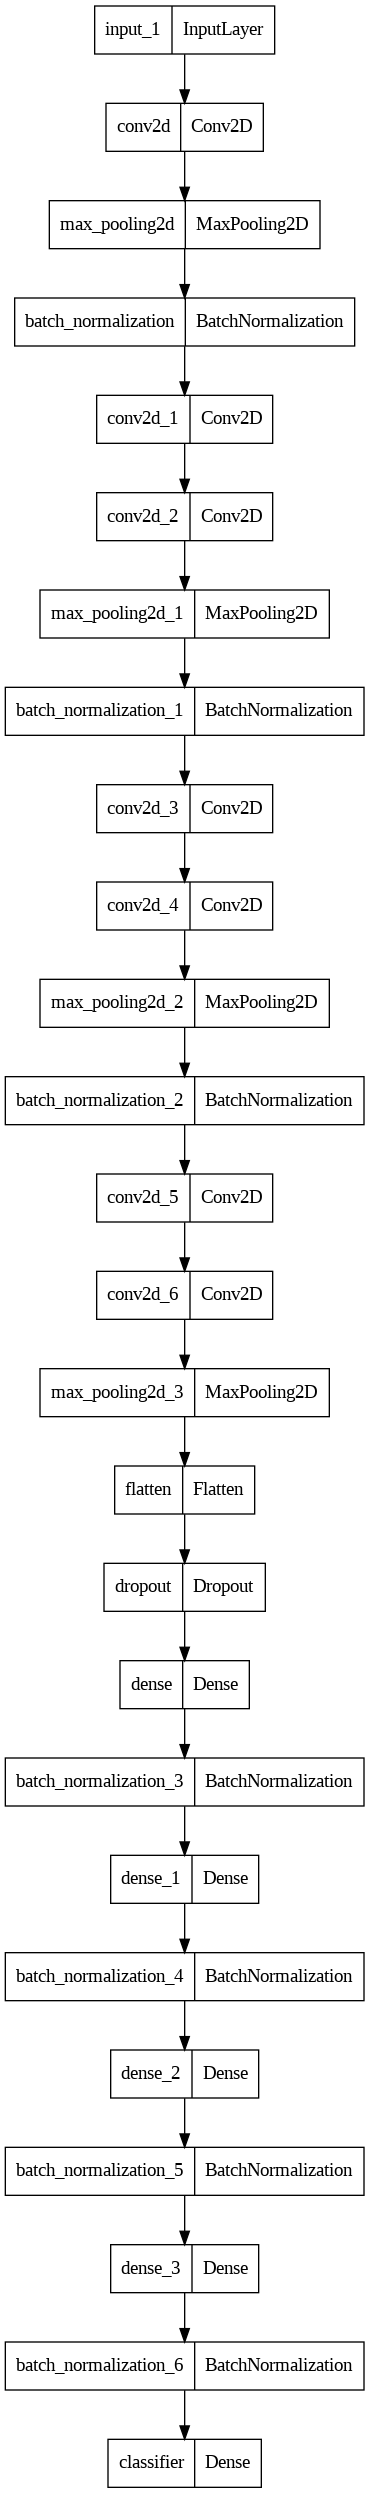

In [22]:
keras.utils.plot_model(model)

In [23]:
model.compile(optimizer='adam' , loss = keras.losses.CategoricalCrossentropy() ,metrics = ['accuracy'])


In [24]:
history = model.fit(X_train ,
                    y_train ,
                    epochs=25 ,
                    batch_size=128,
                    validation_data=(X_test , y_test) ,
                    callbacks=[learning_rate_reduction])

Epoch 1/25
276/276 [==============================] - 286s 1s/step - loss: 1.0905 - accuracy: 0.5942 - val_loss: 0.6493 - val_accuracy: 0.7656 - lr: 0.0010
Epoch 2/25
276/276 [==============================] - 283s 1s/step - loss: 0.4221 - accuracy: 0.8468 - val_loss: 0.3817 - val_accuracy: 0.8669 - lr: 0.0010
Epoch 3/25
276/276 [==============================] - 277s 1s/step - loss: 0.2636 - accuracy: 0.9056 - val_loss: 1.0107 - val_accuracy: 0.6947 - lr: 0.0010
Epoch 4/25
276/276 [==============================] - 279s 1s/step - loss: 0.1845 - accuracy: 0.9334 - val_loss: 0.3590 - val_accuracy: 0.8834 - lr: 0.0010
Epoch 5/25
276/276 [==============================] - 292s 1s/step - loss: 0.1338 - accuracy: 0.9530 - val_loss: 0.3243 - val_accuracy: 0.8920 - lr: 0.0010
Epoch 6/25
276/276 [==============================] - 280s 1s/step - loss: 0.1145 - accuracy: 0.9597 - val_loss: 0.1166 - val_accuracy: 0.9601 - lr: 0.0010
Epoch 7/25
276/276 [==============================] - 270s 979ms

In [25]:
model.evaluate(X_test , y_test)


367/367 [==============================] - 19s 50ms/step - loss: 0.0693 - accuracy: 0.9858


[0.06931933760643005, 0.9857678413391113]

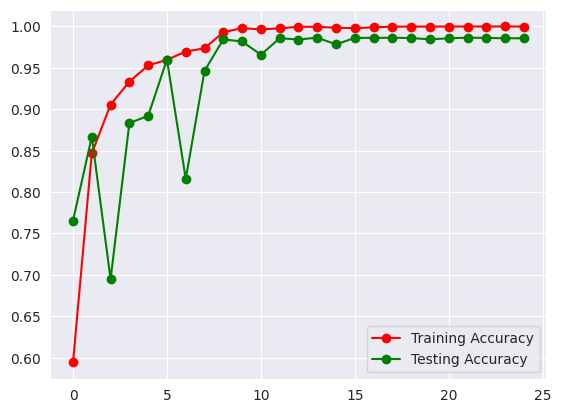

In [26]:
plt.plot(history.history["accuracy"] , 'ro-' , label = "Training Accuracy")
plt.plot(history.history["val_accuracy"] , 'go-' , label = "Testing Accuracy")
plt.legend()
plt.show()

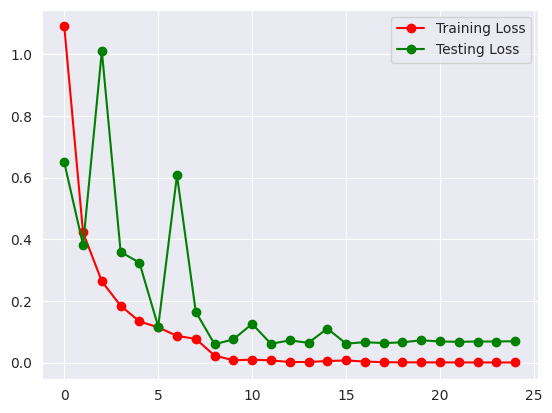

In [27]:
plt.plot(history.history["loss"] , 'ro-' , label = "Training Loss")
plt.plot(history.history["val_loss"] , 'go-' , label = "Testing Loss")
plt.legend()
plt.show()

In [28]:
y_pred  = model.predict(X_test).round()

367/367 [==============================] - 23s 61ms/step


In [29]:
target_names = [f"{classes[i]}" for i in range(7)]
print(classification_report(y_test , y_pred , target_names =target_names ))

                                                               precision    recall  f1-score   support

('akiec', 'Actinic keratoses and intraepithelial carcinomae')       0.99      1.00      1.00      1667
                             ('bcc', ' basal cell carcinoma')       1.00      1.00      1.00      1689
                     ('bkl', 'benign keratosis-like lesions')       0.97      0.99      0.98      1651
                                     ('df', 'dermatofibroma')       1.00      1.00      1.00      1629
                                  ('nv', ' melanocytic nevi')       0.99      0.92      0.95      1663
              ('vasc', ' pyogenic granulomas and hemorrhage')       1.00      1.00      1.00      1680
                                          ('mel', 'melanoma')       0.96      0.99      0.97      1755

                                                    micro avg       0.99      0.99      0.99     11734
                                                    macro avg       0.9

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Axes: title={'center': 'Confusion Matrix'}>

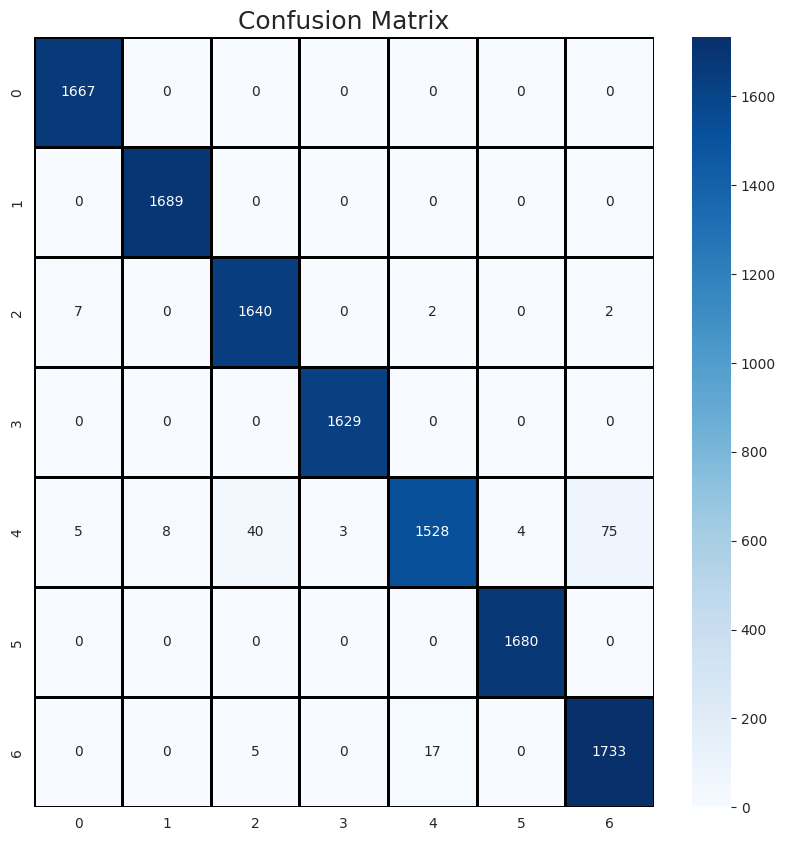

In [30]:
cm = confusion_matrix(y_test.argmax(axis = 1) , y_pred.argmax(axis = 1))
cm = pd.DataFrame(cm , index = [i for i in range(7)] , columns = [i for i in range(7)])
plt.figure(figsize = (10,10))
plt.title('Confusion Matrix', fontsize = 18)
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='')

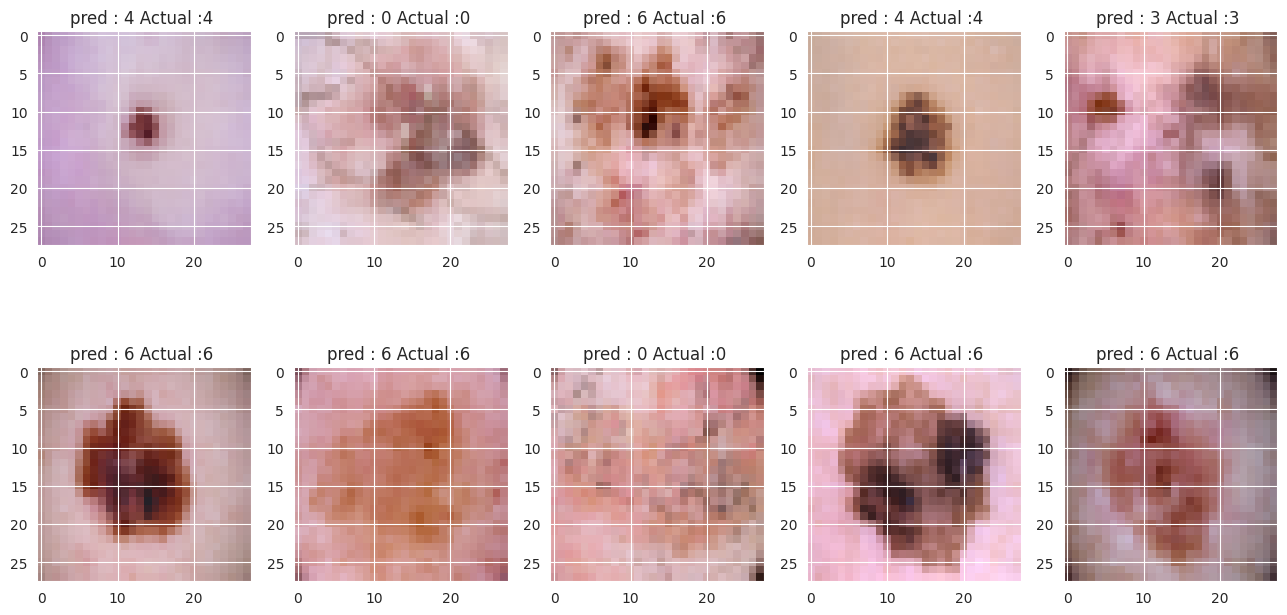

In [31]:
correct = np.nonzero(y_pred == y_test)[0]

k = 0 
plt.figure(figsize=(16, 8))
for c in correct[:10]:
            plt.subplot(2,5,k+1)
            plt.imshow(X_test[k].reshape(28,28,3) , interpolation='none')
            plt.title(f"pred : {y_pred[k].argmax(axis = 0)} Actual :{y_test[k].argmax(axis = 0)} ")
            k += 1